# 00 Preparation
Laden der für die Bearbeitung notwendigen Bibliotheken 📚.

In [5]:
# IMPORT LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 01 Load Data
Laden des Dataset 🚗💨:
- **Brand & Model:** Identify the brand or company name along with the specific model of each vehicle.
- **Model Year:** Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.
- **Mileage:** Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.
- **Fuel Type:** Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.
- **Engine Type:** Understand the engine specifications, shedding light on performance and efficiency.
- **Transmission:** Determine the transmission type, whether automatic, manual, or another variant.
- **Exterior & Interior Colors:** Explore the aesthetic aspects of the vehicles, including exterior and interior color options.
- **Accident History:** Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.
- **Clean Title:** Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.
- **Price:** Access the listed prices for each vehicle, aiding in price comparison and budgeting.

In [6]:
# LOAD DATA
df = pd.read_csv('05_automobile_price.csv')

# 02 Fehlende Werte
Existieren **fehlende Werte** in dem Dataset? Falls ja, entferne 🗑 diese Zeilen oder ersetze ⤹🔠 die fehlenden Werte mit einem passenden Wert.

In [7]:
# FEHLENDE WERTE BEHANDELN
missing_values = df.isnull().sum()
missing_values

brand             0
model             0
model_year        0
fuel_type       170
mileage           0
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [8]:
# KOPIE ANFERTIGEN
df_cleaned = df.copy()
# SPALTEN SELEKTIEREN
df_cleaned = df_cleaned.dropna()

# 03 Spalten Selektieren
Selektiere nur die Spalten **model_year**, **mileage** und **price** ✅.
Die doppelte eckige Klammer erstellt ein neues DataFrame, welches nur die angegebenen Spalten enthält.

In [9]:
# KOPIE ANFERTIGEN
df_selected = df_cleaned.copy()
# SPALTEN SELEKTIEREN
df_selected = df_selected[['model_year', 'mileage', 'price']]

# 04 Split Data
Aufteilen der Daten ✂️ in ein Trainings- und Testdatenset.

In [10]:
# FEATURES UND ZIELVARIBALE
X = df_selected.drop(['price'], axis=1)
Y = df_selected['price']

In [11]:
# SPLIT in 75% TRAIN und 25% TEST
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1234)

# 05 Train Model
Das Model mit einer **Linearen Regression** trainieren 💪.

In [12]:
# LINEARE REGRESSION
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [13]:
# VORHERSAGEN MACHEN
Y_pred = lr.predict(X_test)

# 06 Modell Evaluieren
Die Kennzahlen RMSE und MAE berechnen, um zu bestimmen, wie gut unsere Vorhersagen sind 🧐.

In [14]:
# VORHERSAGE FÜR TESTDATEN
Y_pred_test = lr.predict(X_test)

# VORHERSAGE FÜR TRAINDATEN
Y_pred_train = lr.predict(X_train)

# KENNZAHLEN FÜR TESTDATEN
rmse_test = root_mean_squared_error(Y_test, Y_pred_test)
r2_test = r2_score(Y_test, Y_pred_test)
mae_test = mean_absolute_error(Y_test, Y_pred_test)

# KENNZAHLEN FÜR TRAINDATEN
rmse_train = root_mean_squared_error(Y_train, Y_pred_train)
r2_train = r2_score(Y_train, Y_pred_train)
mae_train = mean_absolute_error(Y_train, Y_pred_train)

# AUSGABE
print("=== TRAININGSDATEN ===")
print(f"RMSE: {rmse_train:.2f}\nR2: {r2_train:.2f}\nMAE: {mae_train:.2f}")

print("\n=== TESTDATEN ===")
print(f"RMSE: {rmse_test:.2f}\nR2: {r2_test:.2f}\nMAE: {mae_test:.2f}")

=== TRAININGSDATEN ===
RMSE: 66793.84
R2: 0.12
MAE: 23961.47

=== TESTDATEN ===
RMSE: 109240.95
R2: 0.04
MAE: 25223.06


07 🌟 BONUS Outlier entfernen

Identifizieren und Entfernen von Ausreißern - also Autos, die besonders billig oder extrem teuer 💶 waren.

# 07 🌟 BONUS Outlier entfernen
Identifizieren und Entfernen von Ausreißern - also Autos, die besonders **billig** oder extrem **teuer** 💶 waren.

### Min, Max und Average berechnen

In [16]:
# MIN, MAX UND MEAN PREIS ANZEIGEN
min_preis = df_selected['price'].min()
mean_preis = df_selected['price'].mean()
max_preis = df_selected['price'].max()

print(f"Billigstes Auto: {min_preis:,.2f}€")
print(f"Avg. Preis Auto: {mean_preis:,.2f}€")
print(f"Teuerstes Auto: {max_preis:,.2f}€")

Billigstes Auto: 2,000.00€
Avg. Preis Auto: 41,241.13€
Teuerstes Auto: 2,954,083.00€


### Preise visualisieren
Da wir einige sehr günstige Autos und einige sehr teure haben, verwenden wir eine **logarithmische Skala** für das Histogramm.

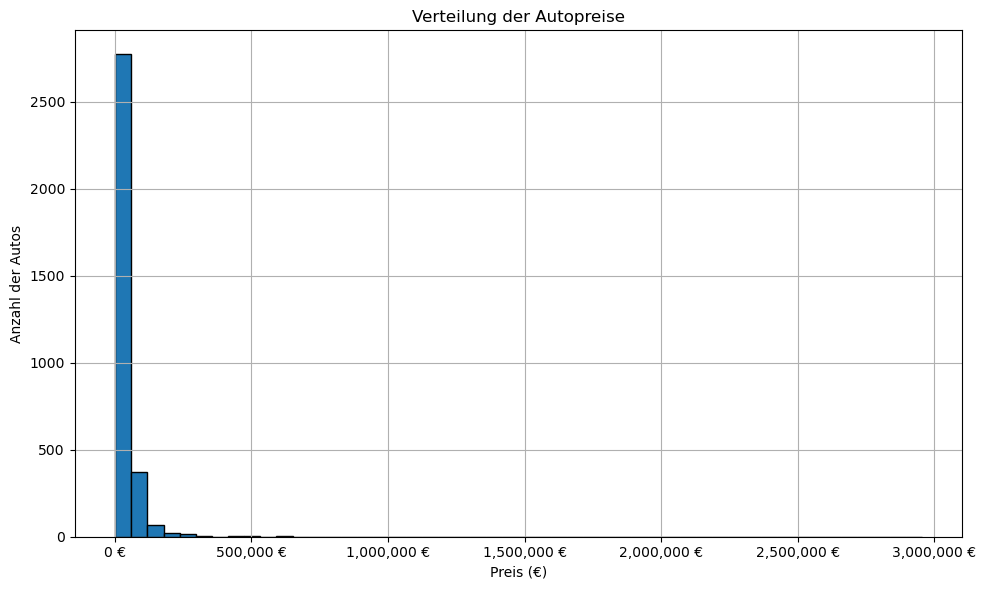

In [17]:
# IMPORT LIBRARIES
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# DIMENSIONEN DES HISTOGRAMM
plt.figure(figsize=(10, 6))
plt.hist(df_selected['price'], bins=50, edgecolor='black')

# TITLE UND LABEL
plt.title('Verteilung der Autopreise')
plt.xlabel('Preis (€)')
plt.ylabel('Anzahl der Autos')

# PREISE X-ACHSE FROMATIEREN
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,} €'))

# HISTOGRAMM ANZEIGEN
plt.grid(True)
plt.tight_layout()
plt.show()

### % Perzentile berechnen
Wo liegen 99% der Preise darüber (1% Perzentil) und wo liegen 90% der Preise darunter (99& Perzentil).

In [18]:
# BERECHNEN 1ST UND 99TH PERCENTILE
p1 = np.percentile(df_selected['price'], 1)
p90 = np.percentile(df_selected['price'], 90)

# FLOOR UND CAP DEFINIEREN
floor_value = p1
cap_value = p90

# FLOOR UND CAP ANWENDEN AUF DATEN
df_selected['price'] = np.clip(df_selected['price'], floor_value, cap_value)

### 📉 Daten Visualisieren
Zeichnen eines **Boxplot**, um festzustellen, ob nach dem Bereiningen noch Ausreißer in den Daten vorhanden sind.

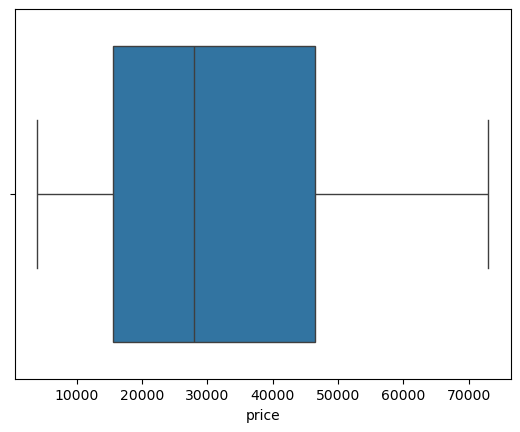

In [19]:
# VISUALISIEREN MIT BOXPLOT
sns.boxplot(x=df_selected['price'])

plt.show()

### 💪 Erneutes Training
Lineare Regression erneut trainieren, um festzustellen, ob die Bereiningung die Vorhersagen nun verbessert.

In [20]:
# SPLIT DATA
X = df_selected.drop(['price'], axis=1)
Y = df_selected['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1234)

# TRAIN MODEL
lr = LinearRegression()
lr.fit(X_train, Y_train)

# VORHERSAGE FÜR TESTDATEN
Y_pred_test = lr.predict(X_test)

# VORHERSAGE FÜR TRAINDATEN
Y_pred_train = lr.predict(X_train)

# KENNZAHLEN FÜR TESTDATEN
rmse_test = root_mean_squared_error(Y_test, Y_pred_test)
r2_test = r2_score(Y_test, Y_pred_test)
mae_test = mean_absolute_error(Y_test, Y_pred_test)

# KENNZAHLEN FÜR TRAINDATEN
rmse_train = root_mean_squared_error(Y_train, Y_pred_train)
r2_train = r2_score(Y_train, Y_pred_train)
mae_train = mean_absolute_error(Y_train, Y_pred_train)

# AUSGABE
print("=== TRAININGSDATEN ===")
print(f"RMSE: {rmse_train:.2f}\nR2: {r2_train:.2f}\nMAE: {mae_train:.2f}")

print("\n=== TESTDATEN ===")
print(f"RMSE: {rmse_test:.2f}\nR2: {r2_test:.2f}\nMAE: {mae_test:.2f}")

=== TRAININGSDATEN ===
RMSE: 14622.14
R2: 0.51
MAE: 11864.86

=== TESTDATEN ===
RMSE: 15120.31
R2: 0.50
MAE: 12067.56
